In [459]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
import re #For reference, re is regular expression support and can be used to search for patterns in STR's
import requests
from bs4 import BeautifulSoup
import datetime as dt

## Contents

1. [Introduction](#1.-Introduction)   
    1.1 [The Powerball](#1.1-Powerball)   
    1.2 [Data_and_Variance](#1.2-Data_and_Variance)    
   
2. [Methods](#2.-Methods)        
   
3. [The_Best_Odds](#3.-Powerball_Stats)    
    3.1 [States](#3.1-States)   
    3.2 [Jackpots](#3.2-Jackpots)   
    3.3 [Days](#3.3-Days)   
    3.4 [The Numbers](#3.4-The_Numbers)   
    3.5 [The Best](#3.5-The_Best)   
    3.6 [Conclusion](#3.6-Conclusion)   
4. [Life_and_The_Powerball](#3-Life_And_The_Powerball)   
    4.1 [Growing](#4.1-Growing)   
    4.1 [Gini_Coefficient](4.2-Gini_Coefficient)   
   

### 1. Introduction

For my Project and to demonstrate the skills that I have developed in Code Louisville, I selected the Powerball.  I picked this topic because I was curious if there was any way to game the system and try to find some kind of statistical advantage that would increase the odds of winning.  In my time exploring that information I got to thinking about a few other things:  Finding and using the most occuring numbers is all good, but could we set ourselves up for the BEST case to win?  So I have analyzed the best State to play, the best Jackpot amount to play even the best day to play!  Then I got to thinking about the Why?  Why do people play Powerball? The odds of winning are so low it's actually hard to really understand how small it is.  In looking into this I think I discovered the underlying reason for who plays the Powerball and why.  Let's go!

(As a side note, the info here is an amalgamation of hours and hours of analysis that has been written in several Jupyter Notebooks in my Github for this project.  These are just the highlights to prove my point.  If for some reason you want to see all my work, it's all there)

#### 1.1 The Powerball

The Powerball is a lottery game that most states participate in, where 5 numbers in a range of 1-69 are drawn with a final 'Powerball' being drawn with a numeric range of 1-26.  The objective is for the individual to pick all the numbers that are drawn at random and then you are given so much money.  Easy, right?  Well the odds of winning the powerball is 1 in 292.2 million.  So, no.  Yet still, the Powerball has grown in popularity year over year and as the population grows so does the participation in the Powerball.  

#### 1.2 Data and Variance

In my exploration of the data I had gathered I discovered that there was a issue with the min max of some of my data.  Come to find out, there was a rule change of the range of the PowerBall.  Looking into this weirdness, apparently in 2015 Powerball changed their Rules on how the game is played as they expanded states to increase the odds of winning, they changed the range of the actual PowerBall from 1-39 to 1-26, to get more people to play.  So I excluded the data up to the switch date for when trying to calculate the best way to win, so that it will all be uniformed with the current ruleset.  I kept the states data as they are.

### 2. Methods

For my process in how to accomplish these tasks I utilized mostly Python in the IDE Jupyter Notebook.  Most of my Web Scrapers I did in PyCharm Community Edition, except for one which I used Jupyter.  I also performed several SQL merges and cleanings in the SQLite IDE DB Browser.  For my libraries I used Pandas, matplotlib, sqlite3, re, numpy, requests, beautifulsoup and seaborn. I also used Tableau for a few visualizations.  I found a few great resources for years of Powerball drawing number data, I also found a lot of statistics on websites that I used web scrapers that I designed to extract that info for formatting to dataframes in Pandas for analysis.  My approach was mostly to try to understand the problems at hand I wanted to address, collect the data, clean all the data up, explore and analyze, interpret the data, visualize it and find the story within it.  


### 3. The Best Odds

#### Running the DataFrames

In [460]:
df = pd.read_csv(r"Powerball.csv", encoding='latin-1')

In [461]:
df.columns #This is just to see all the columns we are working with.  If there were more this would be more useful

Index(['#', 'Draw Date', 'Jackpot Prize', 'Winner', 'State'], dtype='object')

In [462]:
df = df.drop_duplicates() #Saves dupe drops into the dataFrame

In [463]:
df = df.drop(columns = "#") # Got rid of '#' column, that was a product of my enumerate loop in the webscraper, it was not as useful as I thought it would be

In [464]:
df = df.dropna() #Get's rid of all the Null rows, rows with no info are useless

#### 3.1 States

In the data below, this is the stats of Jackpots hit by state from 2003 to 2022.  In the Tableau figure 'Jackpot Winners by State' is from the whole history of Powerball.

In [465]:
df['State'].value_counts().head(8) #Of the recent Jackpots won, PN. had the most wins

State
Pennsylvania    15
Florida         14
Indiana         12
New York        12
California      10
New Jersey      10
Missouri        10
Wisconsin        9
Name: count, dtype: int64

#### Figure 1

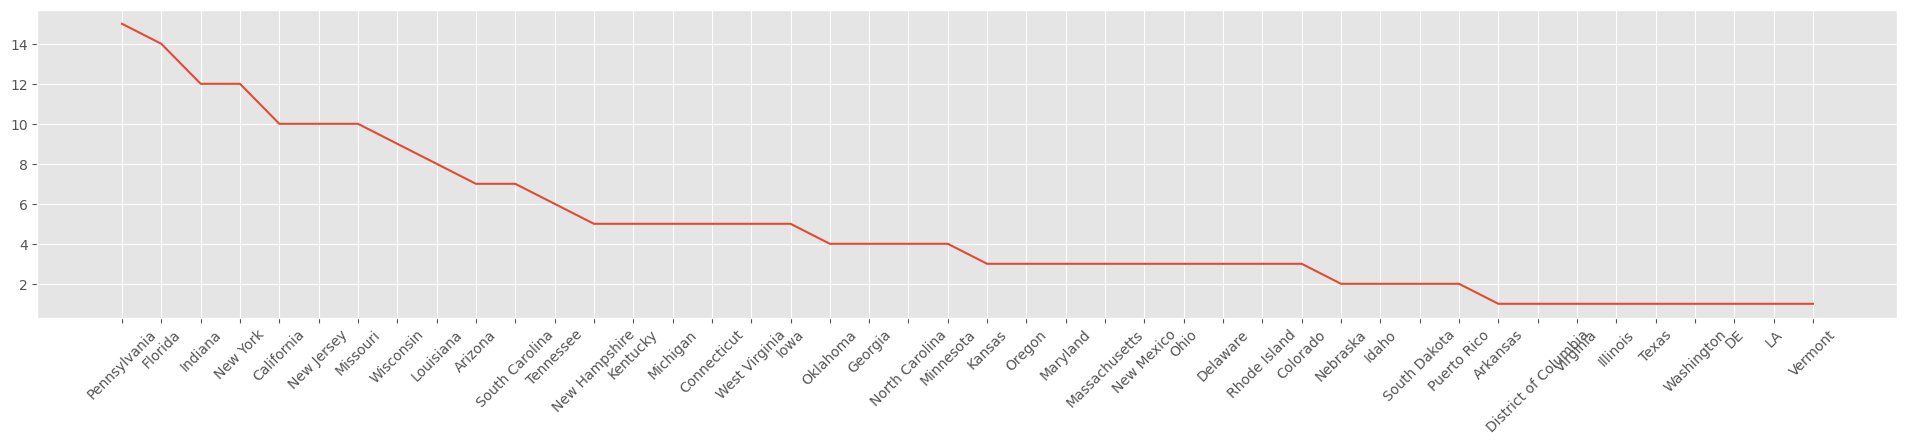

State
Pennsylvania    15
Florida         14
Indiana         12
New York        12
California      10
New Jersey      10
Missouri        10
Wisconsin        9
Name: count, dtype: int64


In [466]:
state = df["State"].value_counts().index
count = df["State"].value_counts().values

fig = plt.figure(figsize=(24, 4))
ax = fig.add_subplot(111)
ax.plot(state, count)

plt.xticks(rotation=45)

plt.show()
print(df['State'].value_counts().head(8))

As we see later in the Data, these are not the States that spend the most on Powerball tickets, which is strange.  In a game of odds, it should be the states that spend the most that should statistically win most often.  In the Tableau figures of all time Data, Indiana wins the most by a large amount, second to Missouri.  I couldn't figure out why this is, other than those states might have a concentration of people who consistently play more often.

#### Tableau Dashboard for Winners by State

Winners by State
https://public.tableau.com/app/profile/sky.mouser/viz/PowerballWinnersbyState/Dashboard1

As stated above, the Dashboard I created is using a data source for all the Powerball Jackpots from the start.  So in our quest for the Golden Ticket, Indiana is going to be our State to play in.  

#### 3.2 Jackpots

How much money are we talking here?  A lot.  But let's take a look to see just how much 

Below is a graph showing how much the Jackpot payouts have grown over the years.  The long, thin rectangles are error bars.  These show the range of variation in the data, main bars are the averages of the values.  As we can see, the values have gone up as time goes on.  

#### Figure 2

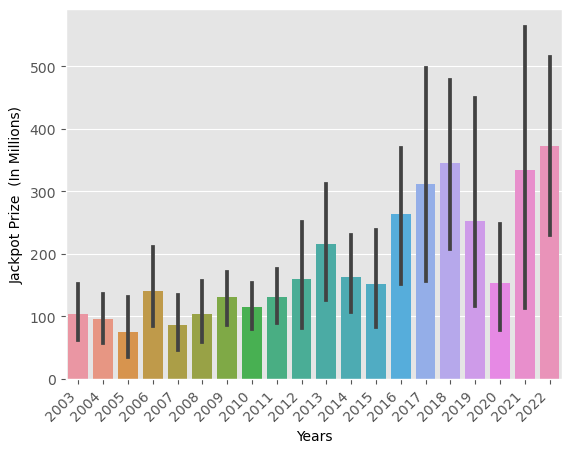

In [467]:
# Converts the str OBJ to a int value.  Because the millions data was a string I had to get the numbers themselves
def convert_to_numeric(x):
    return int(re.findall(r'\d+', x)[0]) #r'\d+' find's one or more digits in str 'x', the [0] is the first element found.  The int then converts that to int.

money = df['Jackpot Prize'].map(convert_to_numeric)

x = df_date["Year"]
y = money



sns.barplot(x = x, y = y)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Years")
plt.ylabel("Jackpot Prize  (In Millions)")
plt.show()

Below is the about the amout range you could expect from hitting the Powerball.

In [468]:
# The average Jackpot Prize size in Millions
money.mean()

163.35238095238094

But if our objective is to figure out the absolute best opportunities to increase our chances to win we should see which Jackpot amounts have been hit the most.  After all, that could tell us what amount would be the best time to play.

In [469]:
df['Jackpot Prize'].value_counts().head(8) #How many times each Jackpot amount was won

Jackpot Prize
$50 Million      9
$15 million      6
$80 Million      4
$70 Million      4
$60 Million      4
$25 Million      2
$136 Million     2
$61.5 million    2
Name: count, dtype: int64

So we now know, about the 50 million dollar jackpot range has historically been the sweet spot to play.  We will consider this for later.

But let's see about amounts won by States.  After all we need to know where to play this magical ticket!

#### Tableau Dashboard Amounts Won by State

2015-Present Jackpot Amount Won by State:
https://public.tableau.com/app/profile/sky.mouser/viz/2015-PresentJackpotAmountWonbyState/Dashboard1

This is interesting, the states that have won the most are California, Wisconsin, New York and Florida.  The amounts are in the Billions for these places, which means they got a couple big wins.  Good for them, but consistency is the persistent key!  After all, we are eyeing that $50 million Jackpot, for the sake of occurrences.

#### 3.3 Days

Let's look at the dates and days to try to figure out when the best day would be to get this goose!

Below we will see the months that win the most.  We have a tie between March and June!  I was wondering why these months, and the best I could come up with is that March is about when Tax returns come in for most people, so maybe the excess money might inspire people to spend a little on a ticket to maybe hit it big!  After all, we did just get money from nowhere (I know how tax returns work, but the sensation of a sweet tax return is like pennies from Heaven)!  As for June, maybe the joy of Summer inspires a search for even more good things.  

#### Figure 3

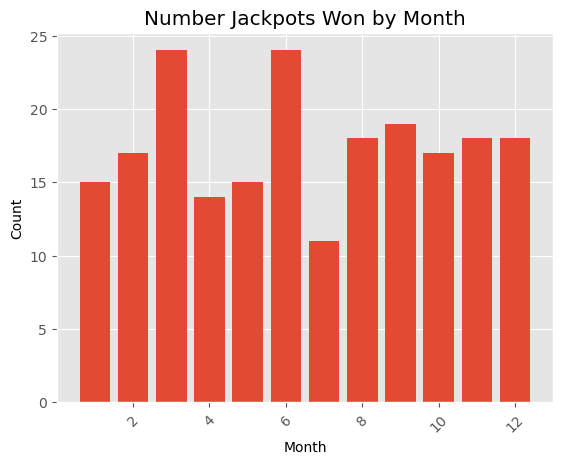

Draw Date
3     24
6     24
9     19
8     18
11    18
12    18
2     17
10    17
5     15
1     15
4     14
7     11
Name: count, dtype: int64

In [470]:
# Converting Data to Datetime for analysis

import datetime as dt

df_date = pd.to_datetime(df["Draw Date"])
df_date['date'] = df_date.dt.date
df_date['date'] =  pd.to_datetime(df_date['date'], format='%Y-%m-%d')

df_date['Month'] = df_date['date'].dt.month
df_date['Year'] = df_date['date'].dt.year
df_date['Day'] = df_date['date'].dt.weekday

df_date ["Month"].value_counts()

month = df_date["Month"].value_counts().index
count = df_date["Month"].value_counts().values

plt.bar(month, count)

plt.title("Number Jackpots Won by Month")
plt.xlabel("Month")
plt.ylabel("Count")

plt.xticks(rotation=45)

plt.show()
df_date['Month'].value_counts()

Okay we have our range of months.  Lets get it down to days.  So the Powerball is drawn on 3 days each week: Monday, Wednesday and Saturday.

#### Figure 4

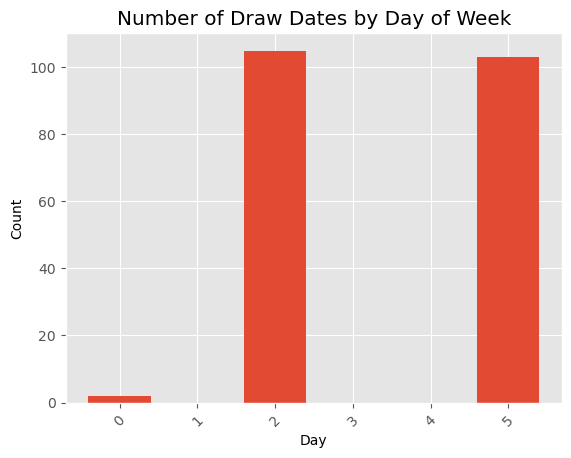

In [471]:
day = df_date["Day"].value_counts().index
count = df_date["Day"].value_counts().values

plt.bar(day, count)

plt.title("Number of Draw Dates by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")

plt.xticks(rotation=45)

plt.show()

Wednesday and Saturday are pretty close!  Wednesday is just a bit higher, so we are going to go with the Wednesday drawing as our best day but Saturday is a good second if that is closer to a $50 million dollar Jackpot or if we couldn't get to Indiana on time.

#### 3.4 The Numbers

We have our place, we have our month and our day; but the Powerball isn't about that, it's about the numbers.  In this section we will get down to what really matters, how to get the right numbers!

In [472]:
#Reading in the Dataframe for this section to run the code
df2 = pd.read_csv(r"Powerball_Data_Analysis_Clean.csv", encoding='latin-1')

For the sake of not showing the entire process that lead me to this, I will just say I tried a series of different approaches to finding what is the best most occurring numbers to play.  I tried to find the min and max of every one of the 5 white balls and the Powerball itself.  The one good thing I learned is that the 5th ball has never been lower than 22.  So by merging all the numbers drawn for the white balls, we get a larger data set to look through for occurances without regard to position drawn and as long as there is at least 1 number above 22 we will be good.  

In [473]:
merged = pd.concat([df2['WB1'], df2['WB2'], df2['WB3'], df2['WB4'], df2['WB5']])

There are our top 5 numbers to play based on how often in each drawing they come up.  This will give us the best chance of them coming up.  61, 32, 21, 63, 36.

In [474]:
#All numbers occurrances
merged.value_counts().head(5)

61    89
32    88
21    86
63    86
36    84
Name: count, dtype: int64

So we have the 5 numbers, but that is only a million dollars.  We need the most important number of all:  The Power Ball!

In [475]:
numbers_frequency = df2['PB'].value_counts()
top_5_numbers_frequency = numbers_frequency.head(5)
print(top_5_numbers_frequency)

PB
4     48
18    48
24    48
14    41
26    40
Name: count, dtype: int64


For the Power Ball, we have 3 options which is kind of heartbreaking.  4, 18, or 24.
For the sake of having a final number, I am going to go for the middle and pick 18.  The odds are just as good the other 2.  

#### 3.5 The Best

We now know what to do for our best chances of success!  To have the best odds of winning: 

1.) Wait for Jackpot to be about 50 Million

2.) The 50 Million Jackpot should fall in March or June

3.) Get Ticket from Indiana

4.) Buy for the Wednesday drawing for best results, but Saturday will work if closer to 50 Million Jackpot or if it makes it March or June.

5.) Play the numbers: 61, 32, 21, 63, 36 and the Power Ball of: 18 (4 or 24 if you feel like it)

#### 3.6 Conclusion

With ALL of this considered, that has to make our odds like 50% right?  Yeah.  I wish.  So I crunched the numbers so you don't have to!  First thing to take into account, the location of buying a ticket doesn't actually matter statistically speaking.  But it's a matter of Luck.  The Powerball is a game of hope, but no one told Math that.  The best that the State, Day and Month as far as statistics are concerned is non-existent.  Yet I have data on it, and we can see patterns; so take that for what it's worth to you.

The odds of hitting the Powerball is 1 in 292.2 Million.  A long shot to say the least.
Playing our numbers, on our day, in our month, with our targeted Jackpot:  Gives you approximately a 0.0000047% edge to win.
.....Wooooo......
That would change your odds from 1 in 292.2 Million to 1 in 292.152 Millon.

So it's not nothing.  But it feels like it might as well be.

### 4. Life and The Powerball

#### 4.1 Growing

So, why play? We live in the Age of Information, the odds have been out there.  With these odds considered, we can assume that the interest in the Powerball has drastically dropped right? Let's take a look at some sales figures:

In [476]:
# Reading in a CSV exported from Web Scraper
df3 = pd.read_csv(r"Years_Sales_Clean.csv", encoding='latin-1')

#### Figure 5

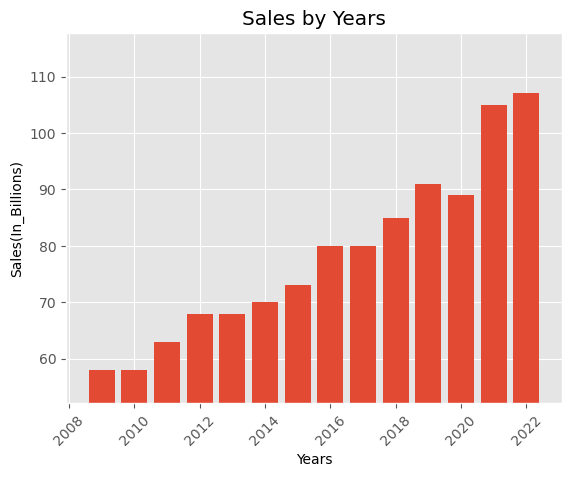

In [477]:
x = df3['Years']
y = df3['Sales(In_Billions)']

plt.bar(x, y)


plt.title("Sales by Years")
plt.xlabel("Years")
plt.ylabel("Sales(In_Billions)")

plt.xticks(rotation=45)
plt.ylim(min(y) * 0.9, max(y) * 1.1)

plt.show()

As we can see from these figures, not only has the Powerball not diminished in the Age of Information, where we literally have the data of how impossible the odds are; it has grown.  By A LOT!  When I saw this originally doing exploration, I seriously got to thinking of why this is?  Is it because the populations growing?  Are people more desperate?  So I started to look into Which places are spending the most on the Powerball:

#### 4.2 Sales by State

In [478]:
df4 = pd.read_csv(r"Lottery_Sales_Stats_Clean.csv", encoding='latin-1')
df4.head(10)

,Unnamed: 0,States,Sales in million U.S. dollars
0,0,New York,10355.48
1,1,Florida,9324.63
2,2,California,8865.75
3,3,Texas,8296.89
4,4,Massachusetts*,5853.59
5,5,Ohio,5628.99
6,6,Georgia,5553.12
7,7,Pennsylvania,5121.29
8,8,Michigan,4896.85
9,9,Maryland,4684.19


So we can see who's spending the most.  But why these States?  They are all pretty populated, but there are some outliers here.  Maryland is in the top 10 of Sales but they are a middle state by population.  So I got to thinking about what could be a driving force that would compel people to buy so many Powerball Tickets.

#### 4.2 Gini Coefficient 

I looked into Wealth Inequality and came upon the Gini Coefficient.  The Gini Coefficient is a summarization of the dispersion of income across an entire populations income distribution.  So it's a good measurement of the Income Gap.  

In [479]:
df5 = pd.read_csv(r"Gini_Sales_Clean.csv", encoding='latin-1')
df5.head(10)

,Unnamed: 0,States,Gini Coeffecient
0,0,New York,0.52
1,1,Connecticut,0.50
2,2,Massachusetts,0.50
3,3,California,0.50
4,4,Louisiana,0.49
5,5,Florida,0.49
6,6,Illinois,0.48
7,7,New Jersey,0.48
8,8,West Virginia,0.48
9,9,Kentucky,0.48


Below we can see a graph shows the Gini Coefficient across all the States.  The Higher the Gini Coefficient, the larger the wage gap.

#### Figure 6

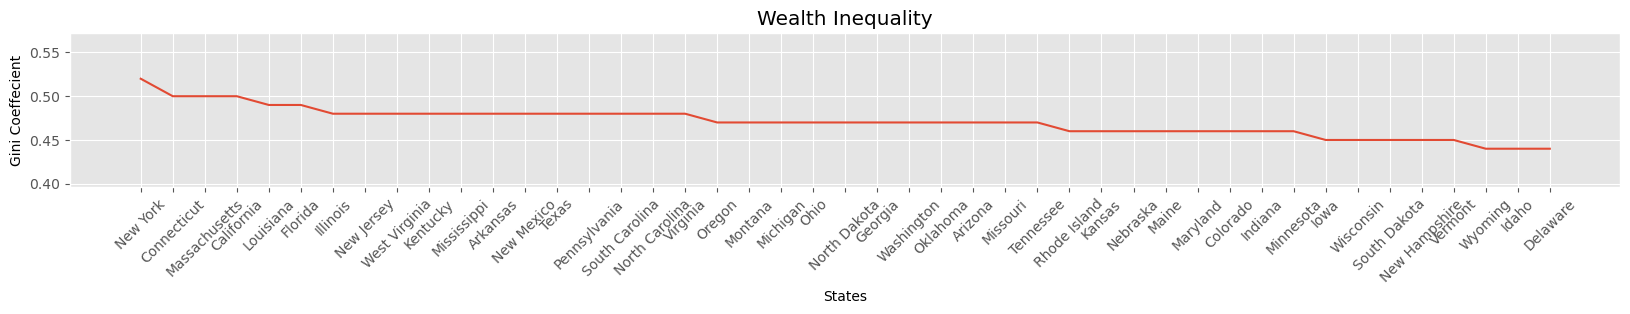

In [480]:
x = df5['States']
y = df5['Gini Coeffecient']

fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.plot(x, y)

plt.title("Wealth Inequality")
plt.xlabel("States")
plt.ylabel("Gini Coeffecient")

plt.xticks(rotation=45)
plt.ylim(min(y) * 0.9, max(y) * 1.1)

plt.show()

So let's get a better look at the Gini stats next to the Sales stats and see how they stack.  Below is a Data Frame I made in my work Notebooks by joining the two tables in SQL.

In the chart below, we see the Index_Inequality on the left, which shows where the States listed are on the ranking of largest Wealth Inequality.  On the right, the Index_Sales, is where the listed States rank in Powerball Sales.  

In [481]:
df6 = pd.read_csv(r"Gini_Sales.csv", encoding='latin-1')
df6.head(10)

,Unnamed: 0,Index_Inequality,State_Inequality,Gini_Coeffecient,Index_Sales,State_Sales,Amount_Sales(In Millions)
0,0,0,New York,0.52,0,New York,10355.48
1,1,1,Connecticut,0.50,20,Connecticut,1462.81
2,2,3,California,0.50,2,California,8865.75
3,3,4,Louisiana,0.49,29,Louisiana,582.93
4,4,5,Florida,0.49,1,Florida,9324.63
5,5,6,Illinois,0.48,12,Illinois,3396.28
6,6,7,New Jersey,0.48,11,New Jersey,3634.15
7,7,8,West Virginia,0.48,21,West Virginia,1382.74
8,8,9,Kentucky,0.48,19,Kentucky,1480.43
9,9,10,Mississippi,0.48,32,Mississippi,432.86


While not perfect, these seem to be pretty good indicators that there is a correlation between Wealth Inequality and States that spend the most on the Powerball.  
 
So is Poverty the main cause?

In [483]:
df7 = pd.read_csv(r"Poverty_States.csv", encoding='latin-1')
df7.head(10)

,State or territory,Population,Population underpoverty line,Poverty rate
0,Puerto Rico,"3,227,457","1,400,958",43.41%
1,Mississippi,"2,883,074","564,439",19.58%
2,Louisiana,"4,532,187","845,230",18.65%
3,New Mexico,"2,053,909","381,026",18.55%
4,West Virginia,"1,755,591","300,152",17.10%
5,Kentucky,"4,322,881","717,895",16.61%
6,Arkansas,"2,923,585","470,190",16.08%
7,Alabama,"4,771,614","762,642",15.98%
8,District of Columbia,"669,089","103,391",15.45%
9,Oklahoma,"3,833,712","585,520",15.27%


If we look at the States with the highest sales in the Powerball, some of these States show up, but not as balanced as with the Gini Coefficient.  Poverty is a factor, but I don't think it's the main factor.  

If I were to infer based on the data available, I would say that Wealth Inequality is the largest factor to the steady growth of the Powerball in the States that do the most Powerball business.  

Thinking on this, I came to the conclusion that it is because in these states, there are many rich people intermingled with poor people.  The exposure of seeing people who have such nice things could easily be a factor that would inspire someone to want to hit it big with the lottery, odds be damned! I also think because we are in the Information Age, social media could also play a role in inciting the lust for quick fortune and instant gratification.  The shrinking of the Middle Class could also be a contributing factor to the growth for similar reasons.  All of these COULD be factors, but with the information I have, it's indeterminate.  Just some idea that I wanted to explore with what was available.  